In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 	
from datetime import datetime, date
import datetime as dt
import seaborn as sns


In [ ]:
# carga de datos

dtype={'Tipo de Cliente': "category", 'Tipo de Contrato': "category",'Tipo de Vivienda': "category" 
      ,'Jornada laboral': "category", 'Tipo de Identificación': "category", 'Régimen de Impuestos': "category" 
      ,'Estado Civil': "category"  ,'Género,Nivel de Estudios': "category", 'Población Vulnerable': "category"
      ,'Régimen de Iva': "category",'Regimen de Renta': "category" }

df = pd.read_csv('contacto final.csv', sep = ';'
                ,low_memory=False, encoding= 'latin-1'
                , dtype=dtype )
df['Fecha de Nacimiento'] = pd.to_datetime(df['Fecha de Nacimiento'], errors="coerce")
dfc = df.copy()  #copia de el data frame original              

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60043 entries, 0 to 60042
Data columns (total 70 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Homologacion Documento de Identidad                              60043 non-null  object        
 1   Sector                                                           60043 non-null  object        
 2   Sucursal                                                         60040 non-null  object        
 3   Tipo de Cliente                                                  60043 non-null  category      
 4   Regional                                                         60042 non-null  object        
 5   Ubicación 2                                                      60043 non-null  object        
 6   Medio de Pago                                                    60043 non-nul

In [ ]:
# rename columns
dfc.columns = ['HOMOLOGACION DOCUMENTO DE IDENTIDAD', 'SECTOR', 'SUCURSAL','TIPO DE CLIENTE', 'REGIONAL', 'UBICACION 2', 'MEDIO DE PAGO',
       'ENENTIDAD FINANCIERA', 'CENTRO DE COSTO', 'TIPO DE CUENTA BANCARIA',
       'SUELDO BASICO', 'VALOR OTROS DESCUENTOS DE NOMINA',
       'EMPRESA DONDE TRABAJA', 'NOMBRE DEL CARGO QUE DESEMPEÑA EN LA EMPRESA',
       'TIPO DE CONTRATO', 'VENCIMIENTO DEL CONTRATO', 'ACTIVIDAD ECONOMICA',
       'TIPO DE VIVIENDA', 'JORNADA LABORAL',
       'AUTORIZA EL ENVIO DE INFORMACION POR MEDIO DE CORREO ELCTRONICO',
       'AUTORIZA LA CONSULTA EN LAS CENTRALES DE RIESGO',
       'TIPO DE IDENTIFICACION', 'REGIMEN DE IMPUESTOS', 'OFICIO',
       'ESTADO CIVIL', 'GENERO', 'FECHA DE NACIMIENTO', 'NIVEL DE ESTUDIOS',
       'NATURALEZA', 'PROFESION U OFICIO', 'MUJER CABEZA DE FAMILIA',
       'FECHA DE EXPEDICION CEDULA', 'LUGAR DE EXPEDICION',
       'POBLACION VULNERABLE', 'REGIMEN DE IVA', 'TIPO DE CONTRIBUYENTE',
       'REGIMEN DE RENTA', 'PERSONA FALLECIDA', 'RESPONSABLE DE HOGAR',
       'ASIGNADO A', 'TELEFONO EMPRESA', 'DIRECCION EMPRESA', 'FAX EMPRESA',
       'INGRESO MENSUAL', 'OTROS INGRESOS', 'CIUDAD EMPRESA',
       'ADMINISTRA RECURSOS PUBLICOS',
       'REALIZA OPERACIONES EN MONEDA EXTRANJERA',
       'DESCRIPCION DE LAS OPERACIONES EN MONEDA EXTRANJERA',
       'POSEE CUENTAS EN MONEDA EXTRANJERA', 'DECLARA RENTA',
       'BANCO MONEDA EXTRANJERA', 'CUENTA MONEDA EXTRANJERA', 'MONEDA',
       'PAIS MONEDA EXTRANJERA', 'EGRESOS MENSUALES',
       'DESCRIPCION OTROS INGRESOS', 'OCUPACION', 'ACTIVIDAD CIIU PRIMARIA',
       'DIRECCION DE RESIDENCIA', 'MOVIL', 'TELEFONO PARTICULAR', 'FAX',
       'CIUDAD RESIDENCIA', 'EMAIL', 'BARRIO RESIDENCIA',
       'DIRECCION COMERCIAL', 'CIUDAD COMERCIAL', 'BARRIO COMERCIAL',
       'DIR CORRESPONDENCIA']


In [ ]:
# choise the best columns
dfc = dfc[['HOMOLOGACION DOCUMENTO DE IDENTIDAD', 'SECTOR', 'SUCURSAL',
       'TIPO DE CLIENTE', 'REGIONAL', 'UBICACION 2', 'TIPO DE CUENTA BANCARIA',
       'SUELDO BASICO', 'NOMBRE DEL CARGO QUE DESEMPEÑA EN LA EMPRESA',
       'TIPO DE CONTRATO', 'VENCIMIENTO DEL CONTRATO', 'ACTIVIDAD ECONOMICA',
       'TIPO DE VIVIENDA', 'JORNADA LABORAL','TIPO DE IDENTIFICACION', 'REGIMEN DE IMPUESTOS', 'OFICIO',
       'ESTADO CIVIL', 'GENERO', 'FECHA DE NACIMIENTO', 'NIVEL DE ESTUDIOS',
       'PROFESION U OFICIO', 'MUJER CABEZA DE FAMILIA',
       'POBLACION VULNERABLE', 'REGIMEN DE IVA',
       'REGIMEN DE RENTA', 'RESPONSABLE DE HOGAR',
       'INGRESO MENSUAL','REALIZA OPERACIONES EN MONEDA EXTRANJERA',
       'POSEE CUENTAS EN MONEDA EXTRANJERA', 'DECLARA RENTA',
	   'OCUPACION', 'ACTIVIDAD CIIU PRIMARIA',
       'DIRECCION DE RESIDENCIA',
       'CIUDAD RESIDENCIA', 'BARRIO RESIDENCIA',
       'DIRECCION COMERCIAL', 'CIUDAD COMERCIAL', 'BARRIO COMERCIAL',
       'DIR CORRESPONDENCIA']].copy()


In [ ]:
# data cleaning 
dfc = dfc.replace('\|.+','',regex=True).copy()
dfc['NIVEL DE ESTUDIOS']  = dfc['NIVEL DE ESTUDIOS'].replace('Magister', 'Maestria',regex=True)
dfc['OCUPACION'] = dfc['OCUPACION'].astype('category')



#create new columns
#create "EDAD" column
now = datetime.now()
dfc['EDAD']  =  int(now.strftime("%Y")) - dfc['FECHA DE NACIMIENTO'].dt.strftime("%Y").astype('float') # creaate agge


In [ ]:
# create count "SECTOR"
sector_count = dfc.groupby(['SECTOR'])['SECTOR'].count()

Text(0, 0.5, 'NUMBER OF PEOPLE')

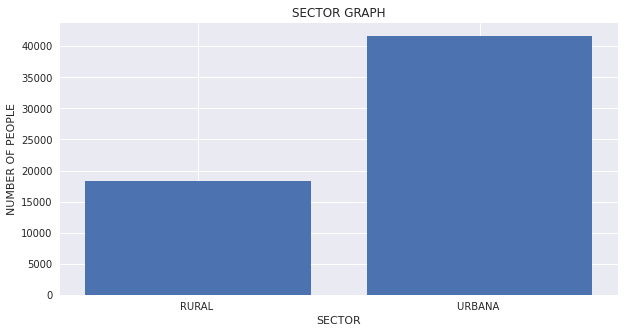

In [ ]:
# plot "SECTOR"
plt.style.use('seaborn')	
plt.figure(figsize=(10, 5)) 
plt.bar(x = sector_count.index, tick_label = sector_count.index ,height =sector_count  ) 
plt.title("SECTOR GRAPH")	
plt.xlabel("SECTOR")
plt.ylabel("NUMBER OF PEOPLE")

In [ ]:
# count level grade study
n_estudios_count = dfc.groupby(['NIVEL DE ESTUDIOS'])['NIVEL DE ESTUDIOS'].count().sort_values(ascending=False)

Text(0, 0.5, 'NUMBER OF PEOPLE')

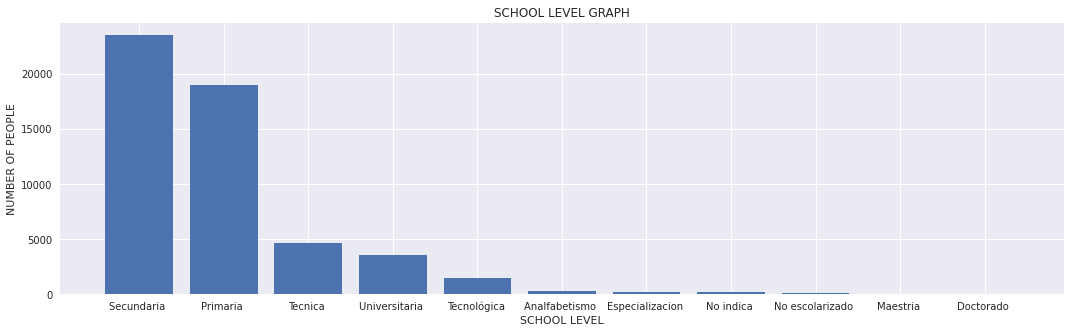

In [ ]:
# plot count level grade study
plt.style.use('seaborn')	
plt.figure(figsize=(18, 5)) 
plt.bar(x = n_estudios_count.index, tick_label = n_estudios_count.index ,height =n_estudios_count  ) 
plt.title("SCHOOL LEVEL GRAPH")	
plt.xlabel("SCHOOL LEVEL")
plt.ylabel("NUMBER OF PEOPLE")

In [ ]:
#count "UBICACION"
ubicacion_count = dfc.groupby(['UBICACION 2'])['UBICACION 2'].count().sort_values(ascending=False)

Text(0, 0.5, 'NUMBER OF PEOPLE')

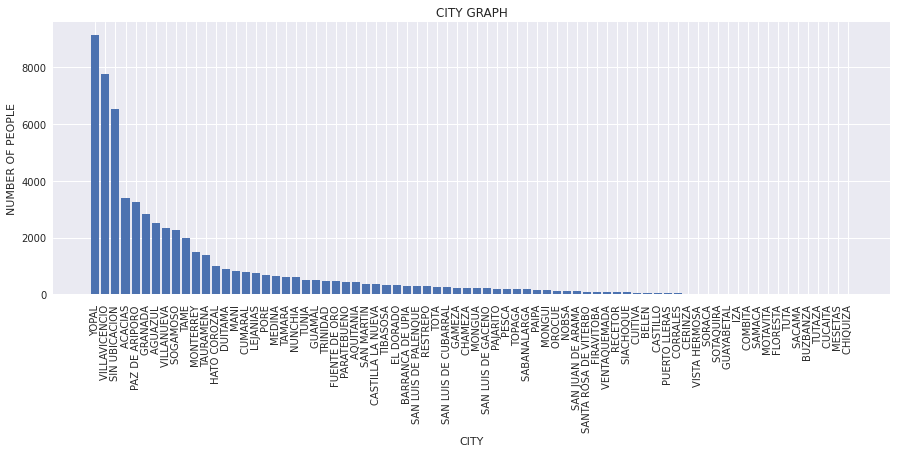

In [ ]:
# plot  "UBICACION"
plt.style.use('seaborn')	
plt.figure(figsize=(15, 5)) 
plt.bar(x = ubicacion_count.index, tick_label = ubicacion_count.index ,height =ubicacion_count  ) 
plt.xticks(rotation=90)
plt.title("CITY GRAPH")	
plt.xlabel("CITY")
plt.ylabel("NUMBER OF PEOPLE")


In [ ]:
# count 'ocupacion'
ocupacion_count = dfc.groupby(['OCUPACION'])['OCUPACION'].count().sort_values(ascending=False)

Text(0, 0.5, 'NUMBER OF PEOPLE')

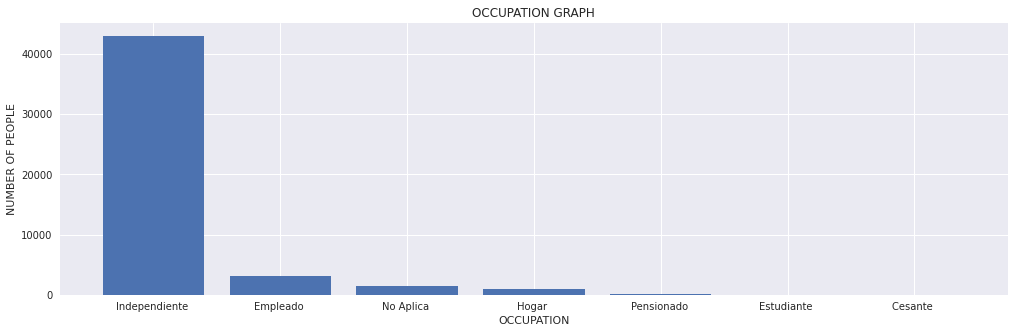

In [ ]:
# plot count 'ocupacion'
plt.style.use('seaborn')	
plt.figure(figsize=(17, 5)) 
plt.bar(x = ocupacion_count.index, tick_label = ocupacion_count.index ,height =ocupacion_count  ) 
plt.title("OCCUPATION GRAPH")	
plt.xlabel("OCCUPATION")
plt.ylabel("NUMBER OF PEOPLE")

In [ ]:
# count age 
edad_count = dfc[(dfc['EDAD']>=18) & (dfc['EDAD']<= 83) ]  #18 years only
edad_count = edad_count.groupby(['EDAD'])['EDAD'].count().sort_values(ascending=False)


Text(0, 0.5, 'NUMBER OF PEOPLE')

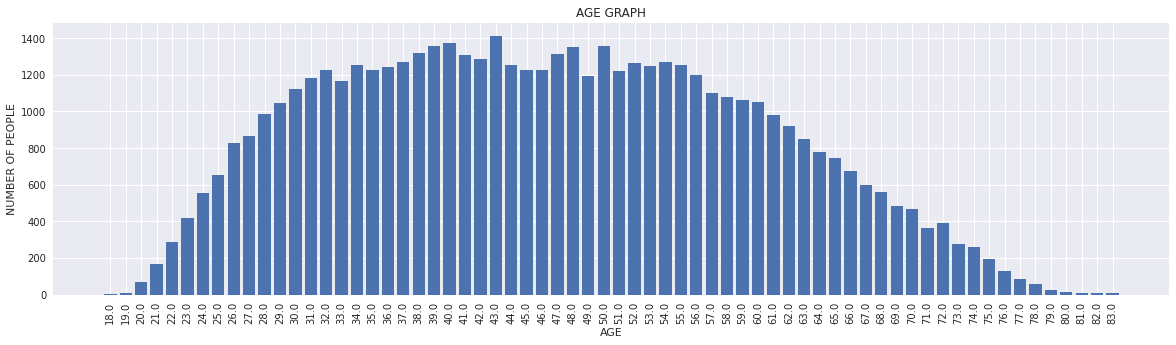

In [ ]:
# plot ege
plt.style.use('seaborn')	
plt.figure(figsize=(20, 5)) 
plt.bar(x = edad_count.index, tick_label = edad_count.index ,height =edad_count  ) 
plt.title("AGE GRAPH")	
plt.xticks(rotation=90)
plt.xlabel("AGE")
plt.ylabel("NUMBER OF PEOPLE")

In [ ]:
dfc['EDAD'][(dfc['EDAD']>=18) & (dfc['EDAD']<= 83) ].describe()

count    53196.000000
mean        46.377716
std         13.211187
min         18.000000
25%         36.000000
50%         46.000000
75%         56.000000
max         83.000000
Name: EDAD, dtype: float64

In [ ]:
dfc.to_csv("CF_clean.csv")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f43d54c6-e174-413e-ae7f-6c729fd7eacf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>